## optional-用测试数据测试不同流程的分类效果

In [1]:
from sklearn.model_selection import train_test_split
from learn_utils import generate_test_data,linear_test,cnn_test
import matplotlib.pyplot as plt
import pandas as pd

### optional-1 生成随机分类数据，大概展示一下数据

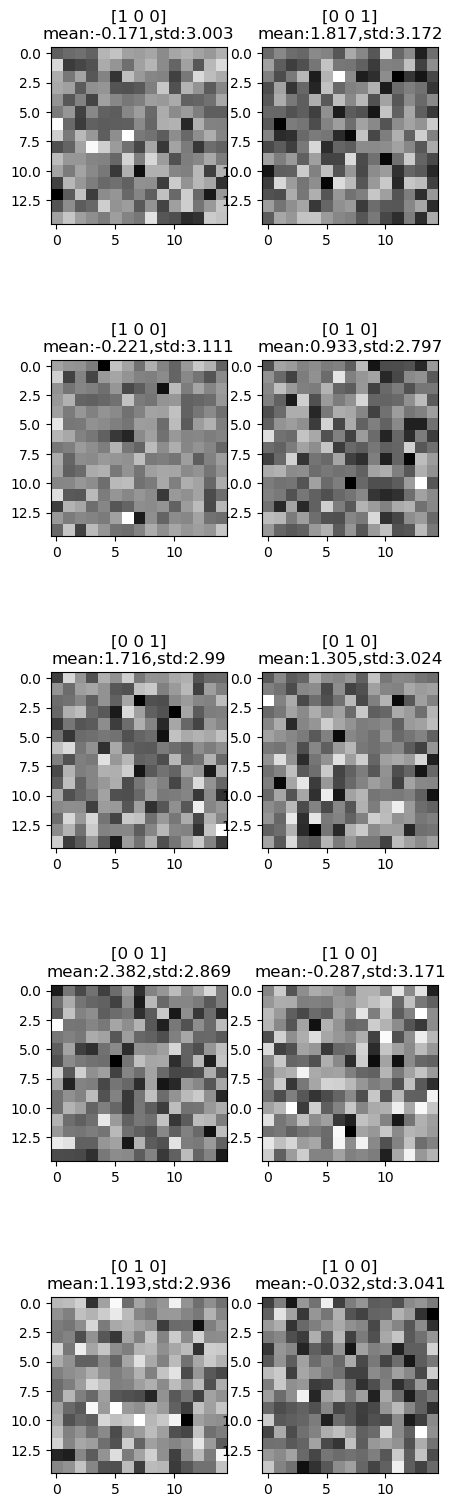

In [2]:
n=15
std=3
x_dat,y_dat= generate_test_data(n,3)
plt.figure(1,figsize=(5,20), dpi=100)
for i in range(10):
    ax = plt.subplot2grid((5, 2), (i%5,i%2 ), colspan = 1, rowspan = 1)
    ax.set_title('{}\nmean:{},std:{}'.format(y_dat[i],round(x_dat[i].mean(),3),round(x_dat[i].std(),3)))
    ax.imshow(x_dat[i],cmap=plt.cm.gray_r)

>上图的分类其实很简单，所有点的值的均值就能将图的类别分开

>可以看出不同图的均值分别是0,1,2.

>分别测试线性还有CNN，看是否能正确区分

### optional-2 线性模型，定义+运行（具体方法linear_test见learn_test.py）

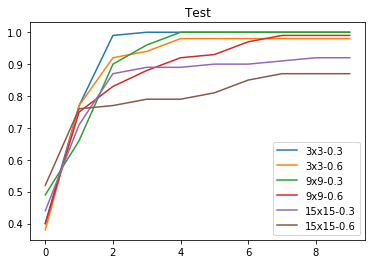

In [3]:
data = []
columns = []
for i in range(3,20,6):
    for j in range(3,7,3):
        data.append(linear_test(i,j/10))
        columns.append('{0}x{0}-{1}'.format(i,j/10))
data=pd.DataFrame(data).T
data.columns=columns
data.plot(title='Test')
plt.legend()
plt.show()

**说明：可以看出模拟的数据，在std小的时候表现要比std大的时候好，且参数的数目也有很大关系，可以防止过拟合**
**这一共是1000张图训练出来的效果，对于15x15这样的参数数目，1000个样本已经无法很好的训练出模型了**

### optional-3 CNN模型，定义+运行（具体方法cnn_test见learn_test.py）

In [4]:
#这步耗时时间非常长，约6~8个小时
data = []
columns = []
for i in range(10,90,10):
    for j in range(1,7,5):
        print('Image size {0}x{0},the std is {1}'.format(i,j/10))
        data.append(cnn_test(i,j/10,5,20))
        columns.append('{0}x{0}-{1}'.format(i,j/10))
data=pd.DataFrame(data).T
data.columns=columns
data.plot(title='Test')
plt.legend()
plt.show()

Image size 10x10,the std is 0.1
Use Time: 27.02 s, train accuracy is 33.33% and test accuracy is 34.00%
Image size 10x10,the std is 0.6
Use Time: 27.67 s, train accuracy is 34.56% and test accuracy is 23.00%
Image size 20x20,the std is 0.1
Use Time: 95.41 s, train accuracy is 100.00% and test accuracy is 100.00%
Image size 20x20,the std is 0.6
Use Time: 94.60 s, train accuracy is 33.56% and test accuracy is 32.00%
Image size 30x30,the std is 0.1
Use Time: 203.71 s, train accuracy is 100.00% and test accuracy is 100.00%
Image size 30x30,the std is 0.6
Use Time: 206.13 s, train accuracy is 33.78% and test accuracy is 30.00%
Image size 40x40,the std is 0.1
Use Time: 352.21 s, train accuracy is 33.22% and test accuracy is 35.00%
Image size 40x40,the std is 0.6
Use Time: 352.40 s, train accuracy is 32.78% and test accuracy is 39.00%
Image size 50x50,the std is 0.1
Use Time: 521.44 s, train accuracy is 33.44% and test accuracy is 33.00%
Image size 50x50,the std is 0.6
Use Time: 523.43 s, tra

KeyboardInterrupt: 

**对于CNN来说，这种看似很明显的类别区分，从卷积上其实无法提取到合适的特征。（100%可能是意外）可能原因如下：**
1. 样本数太少（3x3x5+3x3x6+20x3x3x6+20x3个特征，只有900个样本进行训练）
2. 的确没有卷积特征

In [ ]:
data = []
columns = []
for i in range(10,90,10):
    for j in range(1,7,5):
        print('Image size {0}x{0},the std is {1}'.format(i,j/10))
        data.append(cnn_test(i,j/10,3,10))
        columns.append('{0}x{0}-{1}'.format(i,j/10))
data=pd.DataFrame(data).T
data.columns=columns
data.plot(title='Test')
plt.legend()
plt.show()